In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def wrap_words(text, n):
    by_words = text.split()
    res = []
    for i in range(0, len(by_words), n):
        res.append(' '.join(by_words[i:i+n]))
    return '\n'.join(res)

In [3]:
feature_labels = {
    'Diario o casi diario': 'Dierio',
    'Hago 1-2 días por semana': '1-2/semana',
    'Hago 3-5 días por semana': '3-5/semana',
    'Duermo bien de noche, pero con medicación': 'Bien con medicación',
    'Duermo mal de noche (por ejemplo, me cuesta dormirme, o me levanto varias veces durante la noche)': 'Mal',
    'Algunos alimentos u olores': 'alimentos/olores',
    'Cambios de clima o de la presión atmosférica': 'cambio climatico',
    'Ejercicio moderado': 'Ejercicio',
    'El período o menstruación': 'Menstruación',
    'Luces brillantes o titilantes': 'Luces brillantes',
    'Muchas horas de sueño': 'Dormir mucho',
    'No tengo ningún desencadenante': 'Ninguno',
    'Pocas horas de sueño': 'dormir poco',
    'Situaciones de stress': 'Stress',
    'Vehículo en movimiento': 'Vehículo',
    'Viaje en avión': 'Avión',
    'El dolor de cabeza empeora luego de 15 minutos parado o sentado y suele mejorar si me acuesto por más de 15 minutos': 'Dol-cab 15+ no acostado',
    'El dolor de cabeza me aparece o apareció durante la actividad sexual': 'Dol-cab actividad sexual',
    'Estoy recibiendo tratamiento inmunosupresor por cualquier causa': 'Tratamiento inmunosupresor',
    'He perdido más de 5 kilos en el último mes sin hacer dieta o incrementado actividad física': '5Kl- sin dieta/actividad',
    'La cefalea o dolor de cabeza apareció de golpe y llegó a su máxima intensidad en tan solo segundos': 'Cefalea repentina',
    'La cefalea solo me ocurre durante o luego de toser o hacer un esfuerzo físico': 'Cefalea toser o esfuerzo',
    'Me realizaron recientemente una punción lumbar': 'Punción lumbar reciente',
    'Tengo diagnóstico previo de alguna de las siguientes condiciones: HIV, meningitis, toxoplasmosis, linfoma, malfomación vascular/cerebral': 'Diagnostico previo',
    'Tengo diagnóstico previo de cáncer con o sin tratamiento': 'Cancer',
    'Tengo fiebre sin una causa aparente clara (diagnóstico de gripe o resfrío, neumonía u otra infección diagnosticada por un médico)': 'Fiebre sin causa',
    'Tengo más de 50 años y hasta ahora nunca había tenido este dolor de cabeza': '50+ años sin dol-cab',
    'Tuve un golpe muy fuerte en la cabeza y este dolor apareció luego o hasta 7 días después del golpe': 'dol-cab pos golpe',
    'Detrás de la nariz, en el centro de la frente o en mejillas': 'Centro frontal',
    'Detrás o alrededor de ambos ojos': 'Ojos',
    'Detrás o alrededor de ojo derecho': 'Ojo derecho',
    'Detrás o alrededor de ojo izquierdo': 'Ojo izquierdo',
    'En la frente de la cabeza (frontal)': 'Frontal',
    'En la mitad derecha de la cabeza (hemicránea derecha)': 'Hemicránea derecha',
    'En la mitad derecha de la cara': 'Mitad derecha',
    'En la mitad izquierda de la cabeza (hemicránea izquierda)': 'Hemicránea izquierda',
    'En la mitad izquierda de la cara': 'Mitad izquierda',
    'En toda la cabeza (holocraneana)': 'Holocraneana',
    'Parte de atrás de la cabeza (bioccipital)': 'Bioccipital',
    'Parte superior de la cabeza (biparietal o vertex)': 'biparietal o vertex',
    'En los últimos 3 meses, tuve en promedio menos de 1 episodio de dolor por mes': '1- día/mes',
    'En los últimos 3 meses, tuve en promedio menos de 15 días de dolor por mes': '15- días/mes',
    'En los últimos 3 meses, tuve en promedio más de 15 días de dolor por mes': '15+ días/mes',
    'Tengo entre 1 a 8 ataques de dolor por día, que me pueden durar varios días': '1-8/días',
    'Tengo entre 1 a 8 ataques de dolor por día, que me pueden durar varios días. Luego desaparacen por períodos mayores a un mes.': '1-8/días dispersos',
    'Tengo entre 3 y 200 ataques de dolor por día, muy intensos, acompañados de lagrimeo y ojo rojo': '3-200/día intensos',
    'Cada uno de estos síntomas dura entre 5 y 60 minutos': '5-60 min',
    'Los síntomas me ocurren de un solo lado de la vista o del cuerpo': 'Un solo lado',
    'Si tengo más de un síntoma (por ejemplo, primero alteración en la vista, luego dificultad para pronunciar palabras), aparecen en orden sucesivo y cada uno dura más de 5 minutos': '1+ síntoma en orden',
    'Todavía presente alguno de estos síntomas o me han durado más de una semana, aunque el dolor se haya ido': 'Síntomas duran 1+ semana',
    'Debilidad en alguna parte del cuerpo': 'Debilidad corporal',
    'Falta de sensibilidad en alguna parte del cuerpo (adormecimiento)': 'Falta de sensibilidad',
    'Problemas o dificultad para caminar': 'Problemas p/caminar',
    'Visión doble, oscurecimientos o manchas en la vista': 'Visión doble',
    'Hay cosas que desencadenan mi dolor (viento, lavarme los dientes, comer, tomar)': 'Hay desencadenantes',
    'Nariz congestionada o secreciones de la narina del mismo lado del dolor': 'Nariz congestionada',
    'Ojo rojo o lagrimeo del mismo lado del dolor': 'Ojo rojo/lagrimeo',
    'Pupila de menor tamaño o caída del párpado del mismo lado del dolor': 'Pupila contraida',
    'Párpados hinchados del mismo lado del dolor': 'Parpados hinchados',
    'Sensación de agitación o inquietud': 'Agitación o inquietud',
    'Sudoración de la frente o cara del mismo lado del dolor': 'sudoración cara/frente',
    'Me cuesta pronunciar las palabras': 'Problemas pronunciación',
    'No tengo ningún síntoma antes del dolor de cabeza': 'Sin síntomas',
    'Siento pinchazos o falta de sensibilidad en alguna parte del cuerpo': 'Pinchazos/Falta de sensibilidad',
    'Tengo debilidad en alguna parte del cuerpo (por ejemplo, menos fuerza de un brazo)': 'Debilidad corporal',
    'Tengo vértigo o me siento más torpe': 'Vértigo',
    'Veo estrellas, líneas, puntos blancos o puntos negros que luego desaparecen': 'Vision alucinada',
    'Dolores súbitos muy intensos que duran entre 15 minutos y 3 horas': '15min - 3hs. Intenso',
    'Dolores súbitos muy intensos que duran entre 2 y 30 minutos': '2min - 30min. Intenso',
    'Dolores súbitos muy intensos que duran entre 5 segundos y 4 minutos': '5sec - 4min. Intenso',
    'Me dura entre 15 minutos y hasta 3 horas': '15min - 3hs',
    'Me dura entre 30 minutos y hasta 7 días': '30min - 7días',
    'Me dura entre 4 y 72 horas': '4hs - 72hs',
    'Tengo un dolor continuo desde hace menos de 3 meses': 'Continuo 3- meses',
    'Si, me molesta solo la luz': 'Luz',
    'Si, me molesta solo los sonidos': 'Sonido',
    'Si, me molestan la luz y los sonidos': 'Luz y sonido'
}

In [4]:
df = pd.read_csv('../Migrañas_vs_otras/execution_state/data_preprocess/output/processed_data.csv', sep=';')

In [5]:
categorical_features = pd.DataFrame(
    [c.split('__') for c in df.columns if '__' in c],
    columns=['feature', 'option']
)

numerical_features = [
    'respuesta a medicamento',
    'En cuanto a la intensidad del dolor, señale en una escala de 1 a 10 la intensidad máxima a la que han llegado sus dolores',
    '¿Cuántos días en los últimos 3 meses no ha podido ir a trabajar por su cefalea?',
    '¿Cuántos días en los últimos 3 meses no ha realizado sus tareas domésticas por sus cefaleas?',
    '¿Cuántos días en los últimos 3 meses se perdió actividades familiares, sociales o lúdicas por sus cefaleas?',
    '¿Cuántos días en los últimos 3 meses se redujo por la mitad su productividad en el trabajo por sus cefaleas?',
    '¿Cuántos días en los últimos 3 meses se redujo por la mitad su productividad en la realización de tareas domésticas por la presencia de cefalea?',
    'patient_age',
    'patient_height',
    'patient_weight'
]

binary_features = [
    '¿Este dolor es algo que comenzó recientemente (en el último mes)?',
    '¿Ha notado que su dolor empeora con el ejercicio, como caminar, correr o subir escaleras?',
    '¿Ha sentido náuseas, ganas de vomitar o ha llegado a vomitar durante o después de su dolor de cabeza?'
]

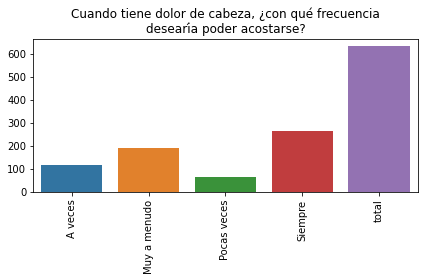

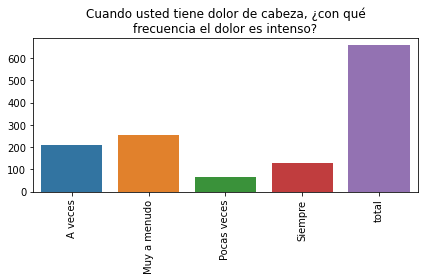

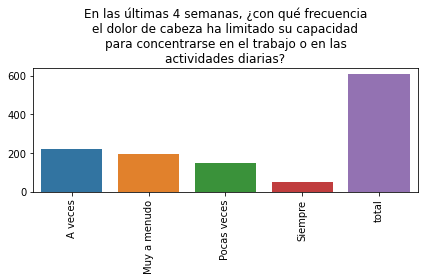

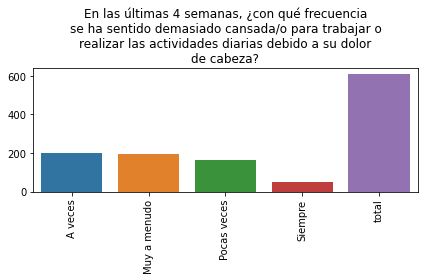

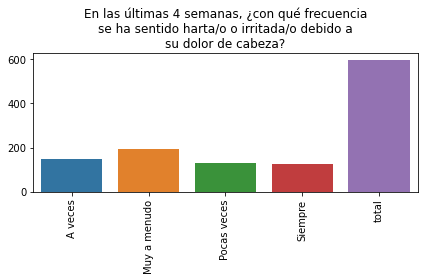

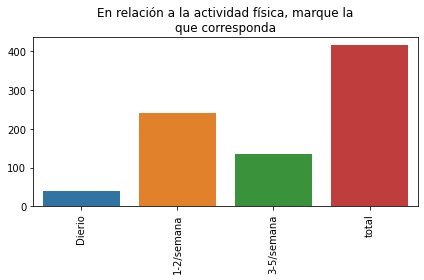

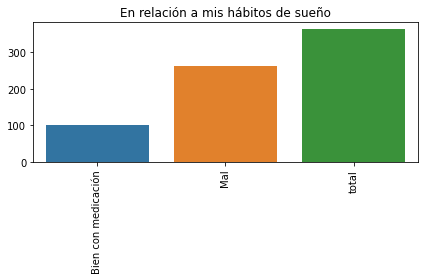

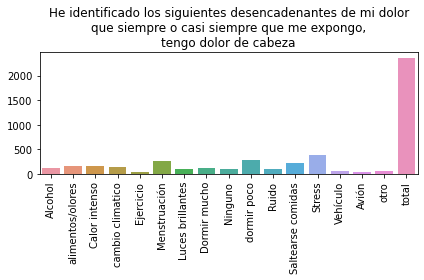

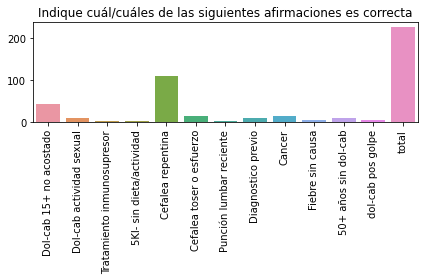

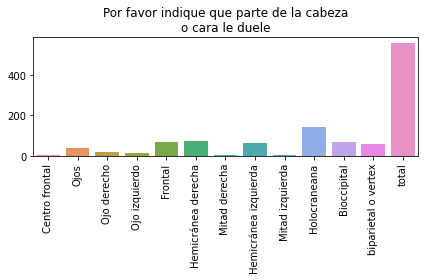

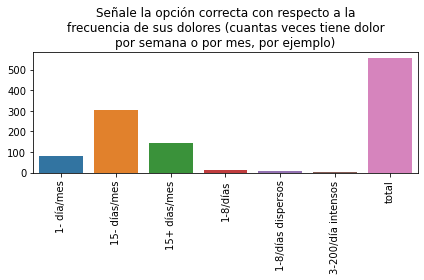

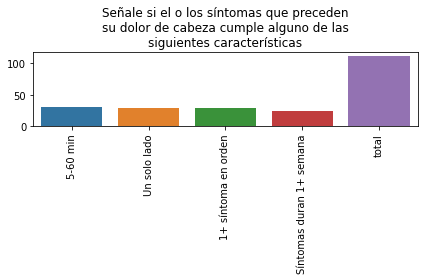

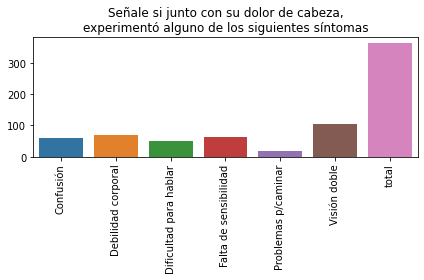

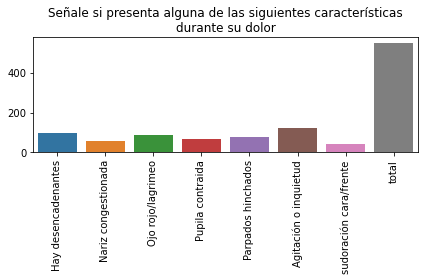

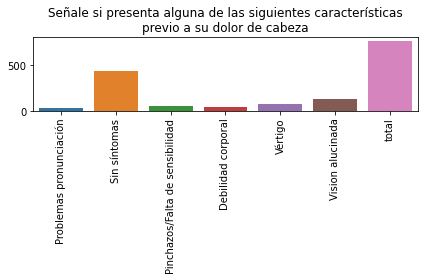

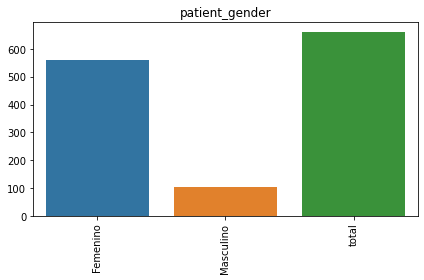

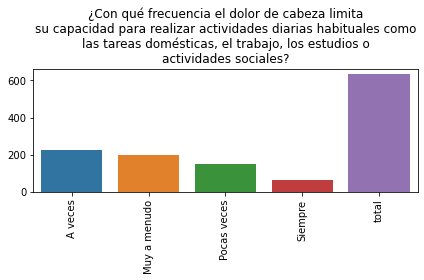

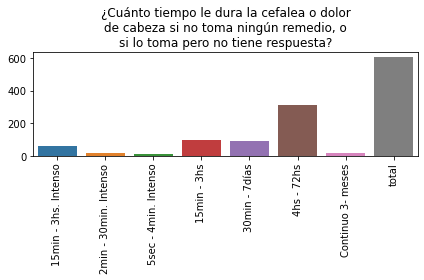

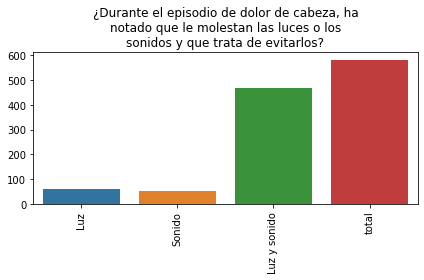

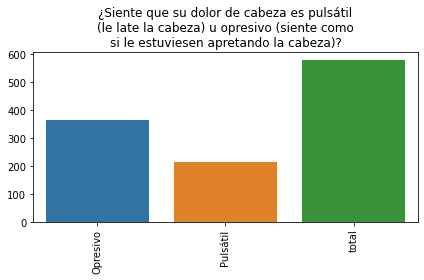

In [6]:
for i, (feature, group) in enumerate(categorical_features.groupby('feature')):
    x = []
    y = []
    for option in group['option']:
        option_label = feature_labels[option] if option in feature_labels else option
        x.append(option_label)
        y.append(df[feature + '__' + option].sum())
    x.append('total')
    total = sum(y)
    y.append(total)

    sns.barplot(x=x, y=y)
    plt.title(wrap_words(feature, 8))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'./images/categorical_{i}.png')
    plt.show()

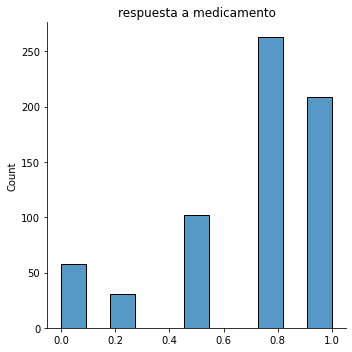

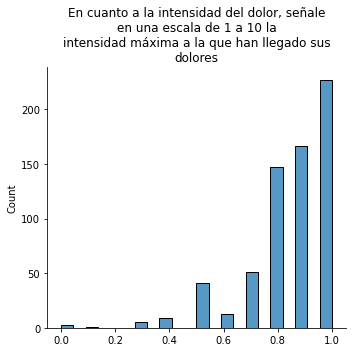

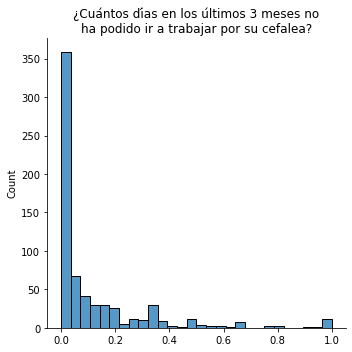

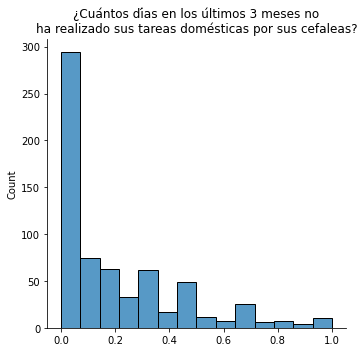

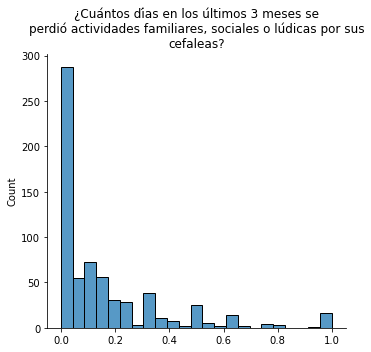

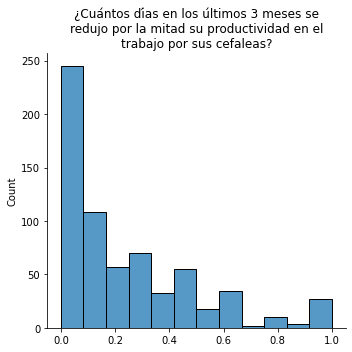

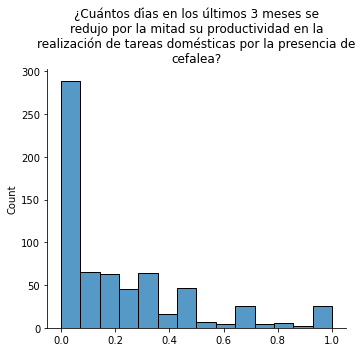

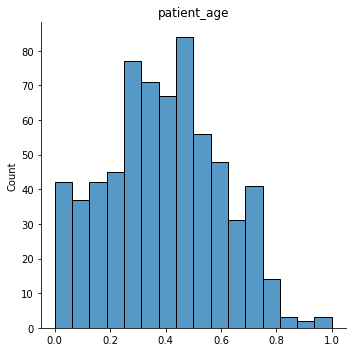

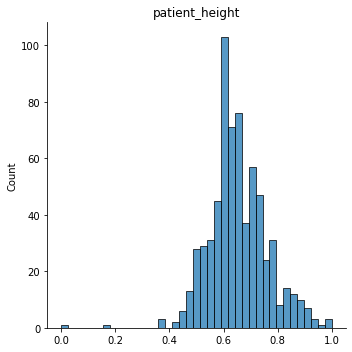

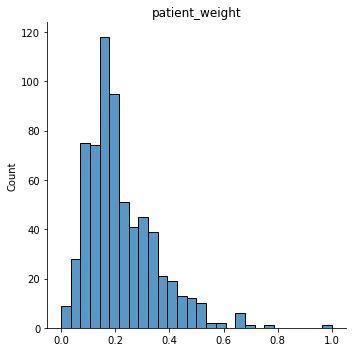

In [7]:
for i, feature in enumerate(numerical_features):
    sns.displot(df[feature])
    plt.xlabel('')
    plt.title(wrap_words(feature, 8))
    plt.tight_layout()
    plt.savefig(f'./images/numerical_{i}.png')
    plt.show()

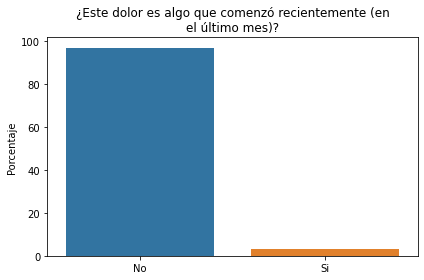

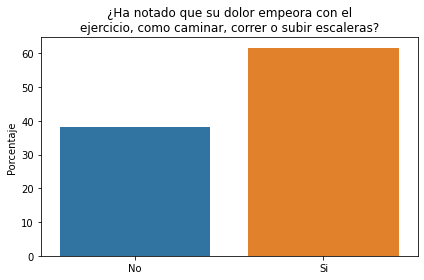

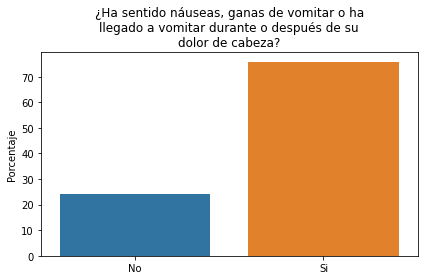

In [8]:
for i, feature in enumerate(binary_features):
    x = df[feature].value_counts(normalize=True)
    sns.barplot(x=x.index, y=x.values * 100)
    plt.ylabel('Porcentaje')
    plt.xlabel('')
    plt.xticks([0,1], ['No','Si'])
    plt.title(wrap_words(feature, 8))
    plt.tight_layout()
    plt.savefig(f'./images/binary_{i}.png')
    plt.show()

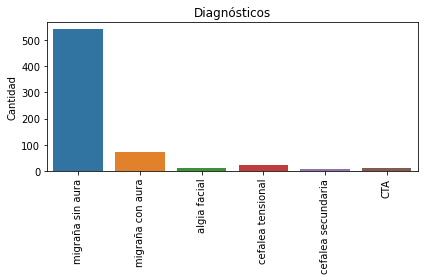

In [9]:
sns.countplot(x=df['condition'])
plt.ylabel('Cantidad')
plt.xlabel('')
plt.title('Diagnósticos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('./images/condition_distributions.png')
plt.show()

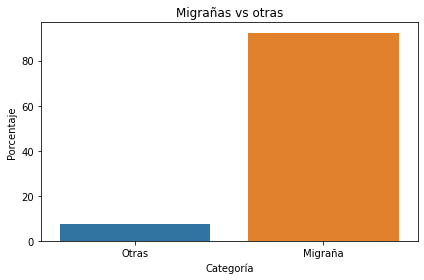

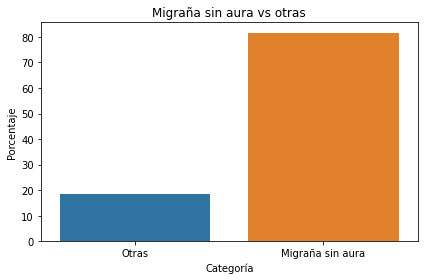

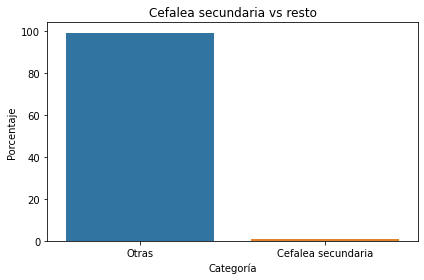

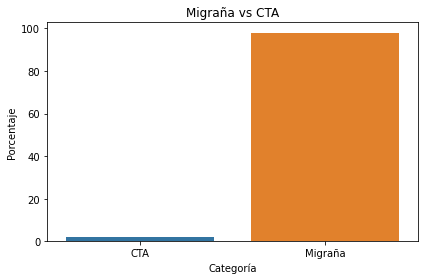

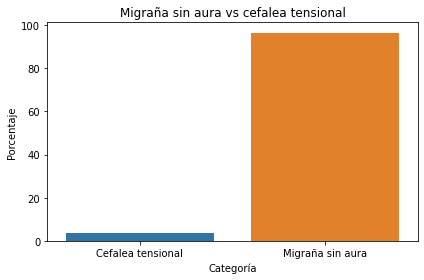

In [10]:
x = df['condition'].isin(['migraña sin aura', 'migraña con aura']).astype(int).value_counts(normalize=True)
sns.barplot(x=x.index, y=x.values * 100)
plt.title('Migrañas vs otras')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['Otras', 'Migraña'])
plt.tight_layout()
plt.savefig('./images/migrañas_vs_otras.png')
plt.show()    

x = (df['condition'] == 'migraña sin aura').astype(int).value_counts(normalize=True)
sns.barplot(x=x.index, y=x.values * 100)
plt.title('Migraña sin aura vs otras')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['Otras', 'Migraña sin aura'])
plt.tight_layout()
plt.savefig('./images/migraña_sin_aura_vs_otras.png')
plt.show()

x = (df['condition'] == 'cefalea secundaria').astype(int).value_counts(normalize=True)
sns.barplot(x=x.index, y=x.values * 100)
plt.title('Cefalea secundaria vs resto')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['Otras', 'Cefalea secundaria'])
plt.tight_layout()
plt.savefig('./images/Cefalea_secundaria_vs_resto.png')
plt.show()

df_t = df[df['condition'].isin(['migraña sin aura', 'migraña con aura', 'CTA'])]
x = df_t['condition'].isin(['migraña sin aura', 'migraña con aura']).astype(int).value_counts(normalize=True)
sns.barplot(x=x.index, y=x.values * 100)
plt.title('Migraña vs CTA')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['CTA', 'Migraña'])
plt.tight_layout()
plt.savefig('./images/Migraña_vs_CTA.png')
plt.show()


df_t = df[df['condition'].isin(['migraña sin aura', 'cefalea tensional'])]
x = (df_t['condition'] == 'migraña sin aura').astype(int).value_counts(normalize=True)
sns.barplot(x=x.index, y=x.values * 100)
plt.title('Migraña sin aura vs cefalea tensional')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.xticks([0, 1], ['Cefalea tensional', 'Migraña sin aura'])
plt.tight_layout()
plt.savefig('./images/Migraña_sin_aura_vs_cefalea_tensional.png')
plt.show()